In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [ ]:
df = pd.read_csv('C:\\Users\\kanak\\OneDrive\\Desktop\\mpr\\nasa.csv')

In [ ]:
df.head()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,3514799,3514799,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True


In [ ]:
df.shape

(4687, 40)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Neo Reference ID              4687 non-null   int64  
 1   Name                          4687 non-null   int64  
 2   Absolute Magnitude            4687 non-null   float64
 3   Est Dia in KM(min)            4687 non-null   float64
 4   Est Dia in KM(max)            4687 non-null   float64
 5   Est Dia in M(min)             4687 non-null   float64
 6   Est Dia in M(max)             4687 non-null   float64
 7   Est Dia in Miles(min)         4687 non-null   float64
 8   Est Dia in Miles(max)         4687 non-null   float64
 9   Est Dia in Feet(min)          4687 non-null   float64
 10  Est Dia in Feet(max)          4687 non-null   float64
 11  Close Approach Date           4687 non-null   object 
 12  Epoch Date Close Approach     4687 non-null   int64  
 13  Rel

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

Neo Reference ID                0
Name                            0
Absolute Magnitude              0
Est Dia in KM(min)              0
Est Dia in KM(max)              0
Est Dia in M(min)               0
Est Dia in M(max)               0
Est Dia in Miles(min)           0
Est Dia in Miles(max)           0
Est Dia in Feet(min)            0
Est Dia in Feet(max)            0
Close Approach Date             0
Epoch Date Close Approach       0
Relative Velocity km per sec    0
Relative Velocity km per hr     0
Miles per hour                  0
Miss Dist.(Astronomical)        0
Miss Dist.(lunar)               0
Miss Dist.(kilometers)          0
Miss Dist.(miles)               0
Orbiting Body                   0
Orbit ID                        0
Orbit Determination Date        0
Orbit Uncertainity              0
Minimum Orbit Intersection      0
Jupiter Tisserand Invariant     0
Epoch Osculation                0
Eccentricity                    0
Semi Major Axis                 0
Inclination   

<AxesSubplot:>

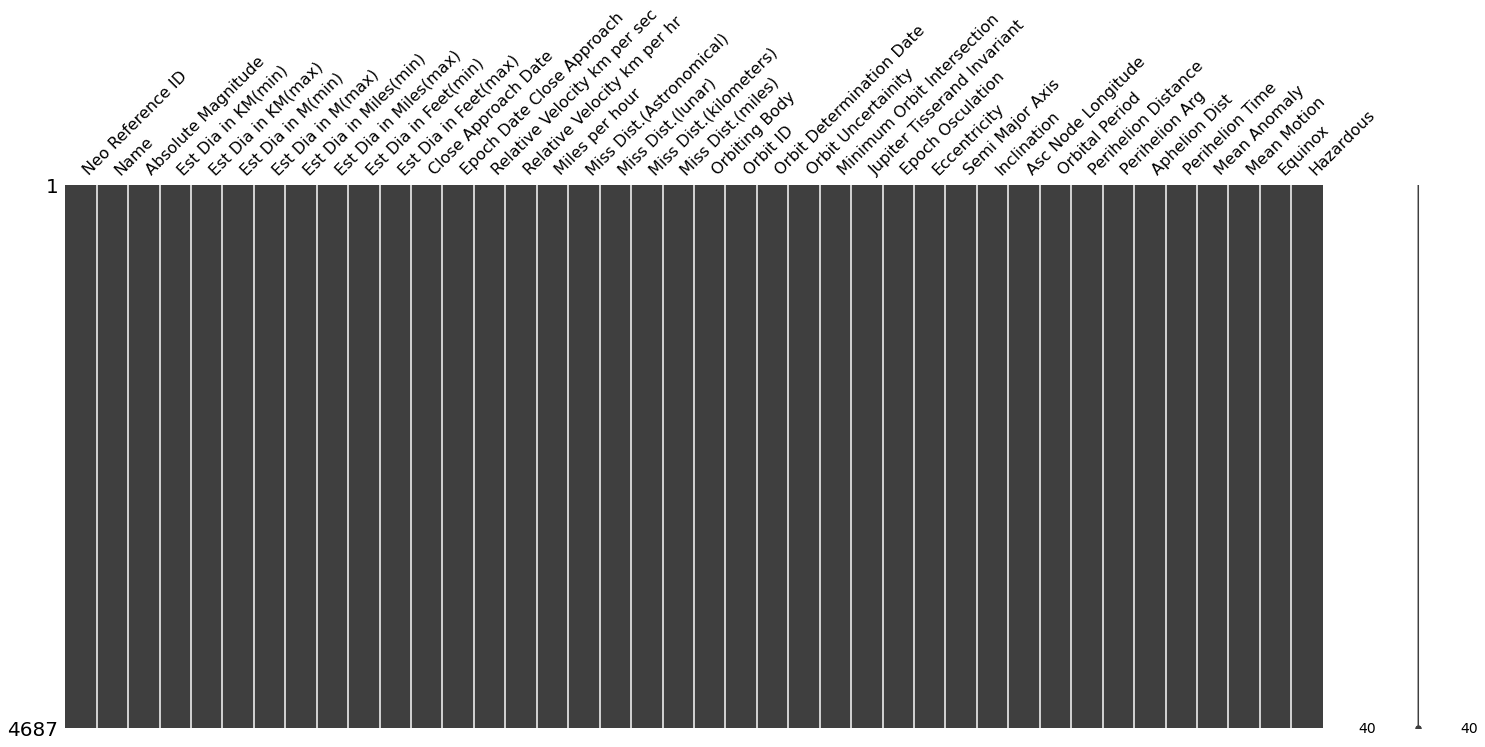

In [ ]:
# Check for missing values
print(df.isnull().sum())

# Visually inspect missing values
msno.matrix(df)

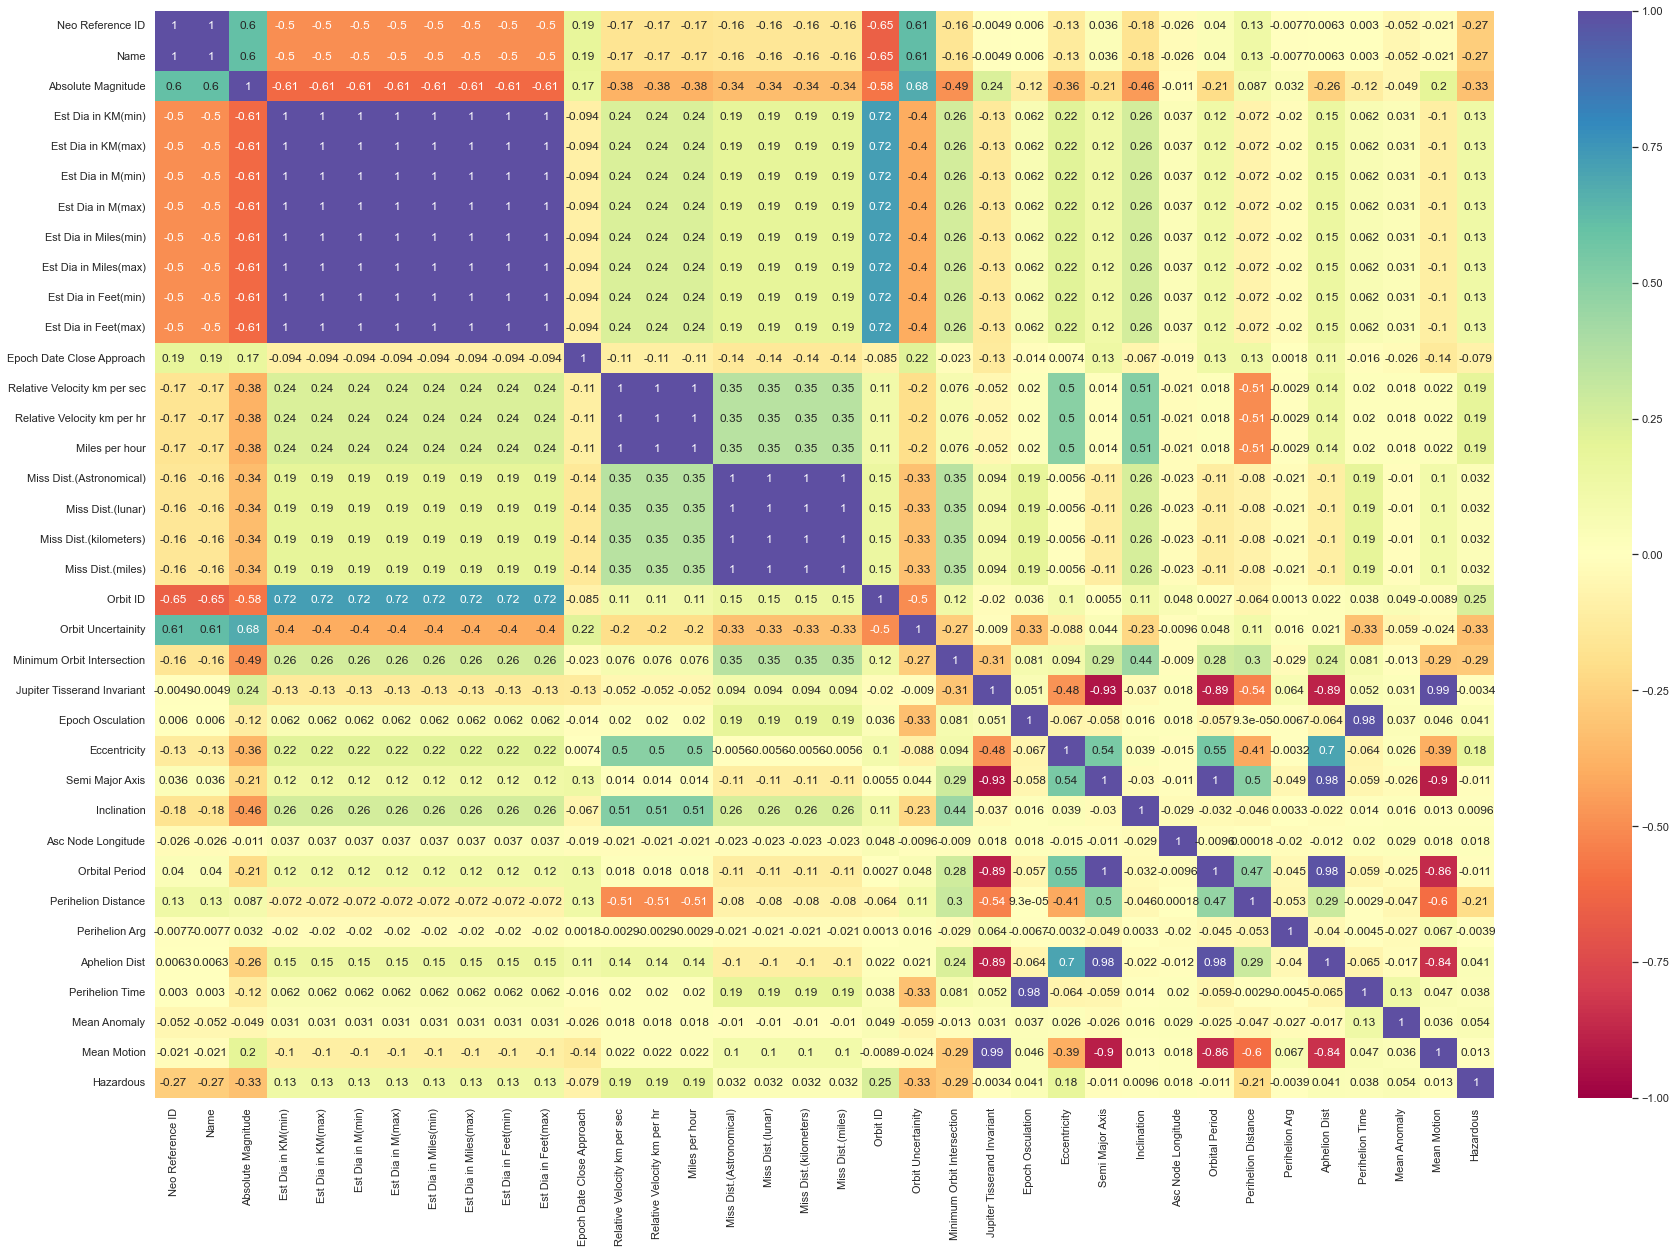

In [ ]:
#Checking visually for feature correlation
sns.set(rc={'figure.figsize':(30,20)})
sns.heatmap(df.corr(), vmin=-1, vmax=1, cmap="Spectral", annot=True)
plt.show()
plt.close()

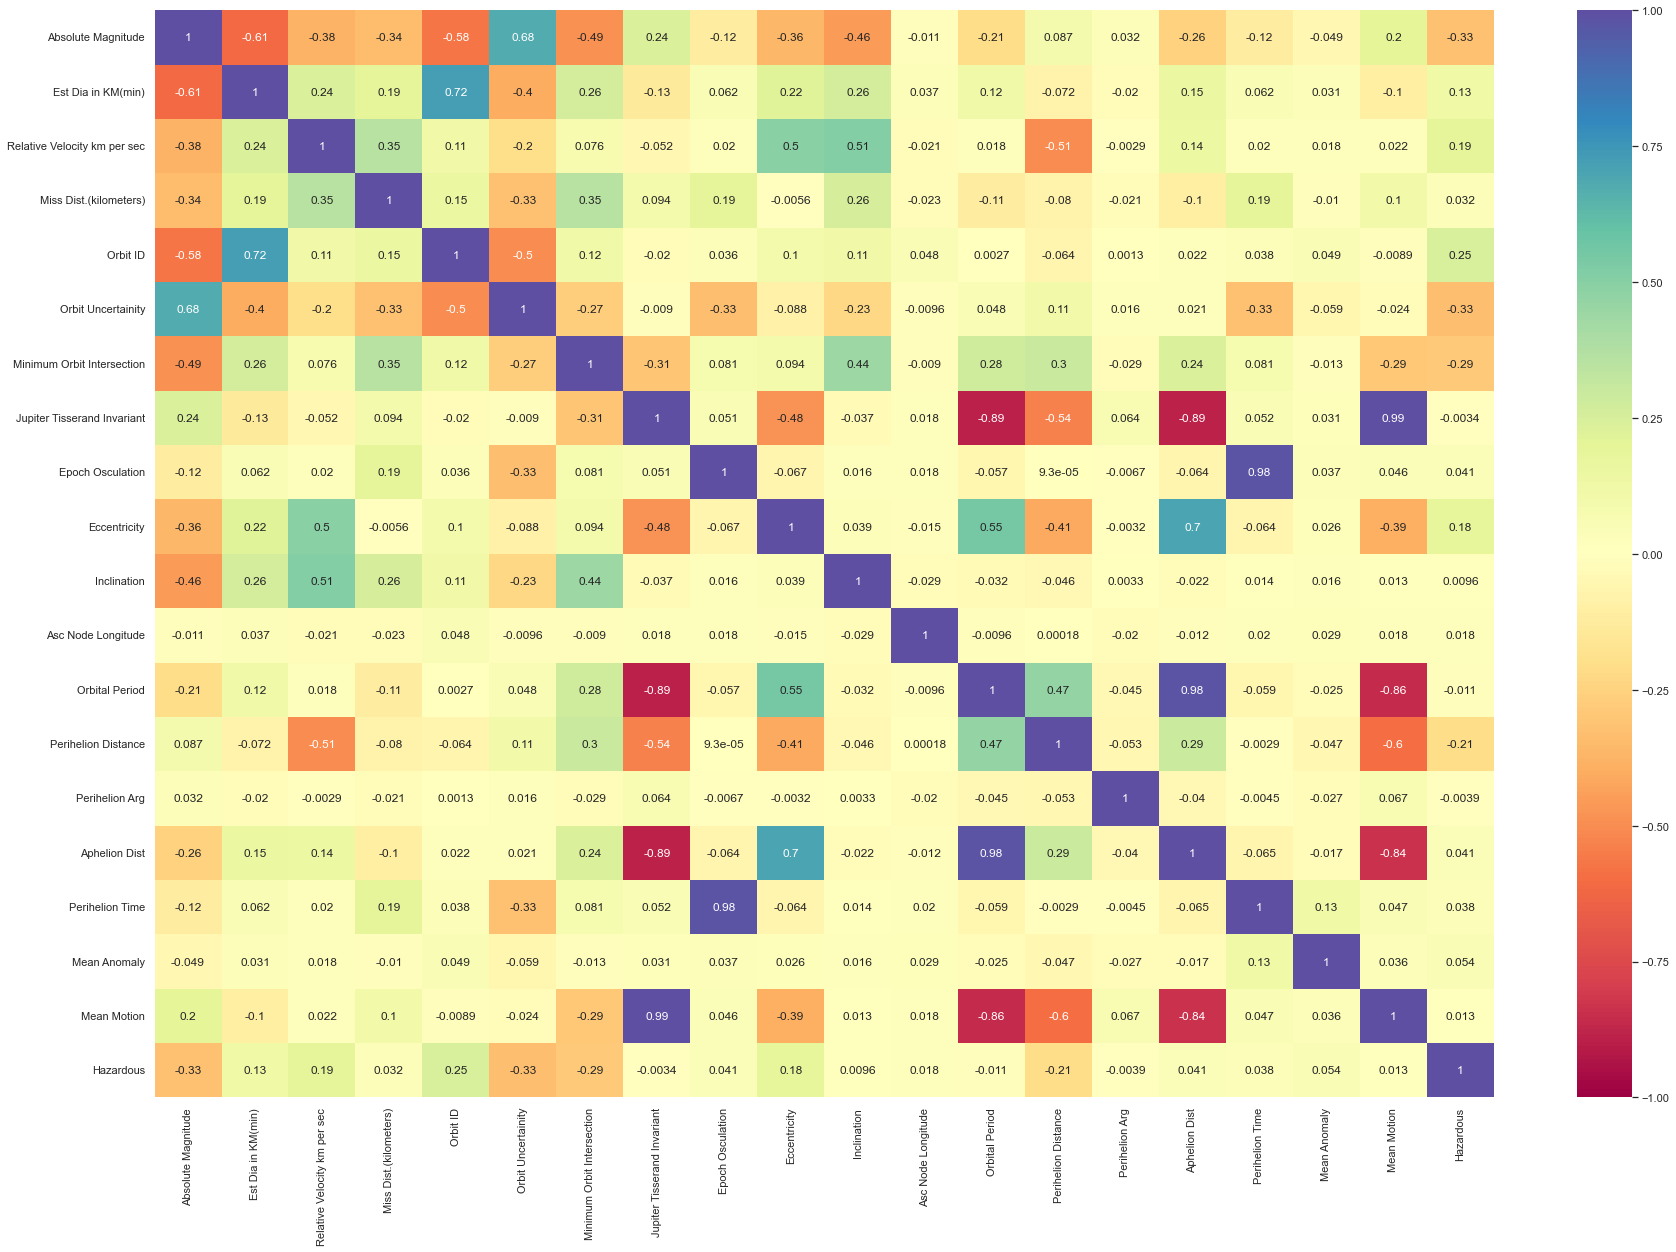

In [ ]:
# Dropping completely correlated features and datetime features
df = df.drop(['Est Dia in M(min)', 'Est Dia in M(max)', 'Est Dia in Miles(min)', 'Est Dia in Miles(max)', 'Est Dia in Feet(min)', 'Est Dia in Feet(max)', 'Est Dia in KM(max)',
              'Relative Velocity km per hr', 'Miles per hour',
              'Miss Dist.(Astronomical)', 'Miss Dist.(lunar)', 'Miss Dist.(miles)',
              'Semi Major Axis',
              'Neo Reference ID', 'Name',
              'Close Approach Date', 'Epoch Date Close Approach', 'Orbit Determination Date'],axis=1)

# Plotting feature correlation with reduced dataset
sns.set(rc={'figure.figsize':(30,20)})
sns.heatmap(df.corr(), vmin=-1, vmax=1, cmap="Spectral", annot=True)
plt.show()
plt.close()

In [ ]:
# Encoding the target variable
from sklearn.preprocessing import LabelEncoder
l_enc = LabelEncoder()
df['hazardous'] = l_enc.fit_transform(df.Hazardous) 
print('Hazardous == True -> 1')
print('Hazardous == False -> 0\n')

# Checking if the other categorical features need to be encoded
print(df['Orbiting Body'].unique())
print(df['Equinox'].unique())
print('\n')
# Removing them since there is only a single value that is identical across all observations
df = df.drop(['Orbiting Body', 'Equinox', 'Hazardous'], axis=1)

# Check after all the changes
print(df.info())
df.head()

Hazardous == True -> 1
Hazardous == False -> 0

['Earth']
['J2000']


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Absolute Magnitude            4687 non-null   float64
 1   Est Dia in KM(min)            4687 non-null   float64
 2   Relative Velocity km per sec  4687 non-null   float64
 3   Miss Dist.(kilometers)        4687 non-null   float64
 4   Orbit ID                      4687 non-null   int64  
 5   Orbit Uncertainity            4687 non-null   int64  
 6   Minimum Orbit Intersection    4687 non-null   float64
 7   Jupiter Tisserand Invariant   4687 non-null   float64
 8   Epoch Osculation              4687 non-null   float64
 9   Eccentricity                  4687 non-null   float64
 10  Inclination                   4687 non-null   float64
 11  Asc Node Longitude            4687 non-null   float

,Absolute Magnitude,Est Dia in KM(min),Relative Velocity km per sec,Miss Dist.(kilometers),Orbit ID,Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,hazardous
0,21.6,0.127220,6.115834,62753692.0,17,5,0.025282,4.634,2458000.5,0.425549,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,1
1,21.3,0.146068,18.113985,57298148.0,21,3,0.186935,5.457,2458000.5,0.351674,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,0
2,20.3,0.231502,7.590711,7622911.5,22,0,0.043058,4.557,2458000.5,0.348248,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,1
3,27.4,0.008801,11.173874,42683616.0,7,6,0.005512,5.093,2458000.5,0.216578,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,0
4,21.6,0.127220,9.840831,61010824.0,25,1,0.034798,5.154,2458000.5,0.210448,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,1


In [ ]:
X= df.drop(columns = ['hazardous'], axis=1)
y= df[['hazardous']]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=0)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)

In [ ]:
pred1 = clf.predict(X_test)

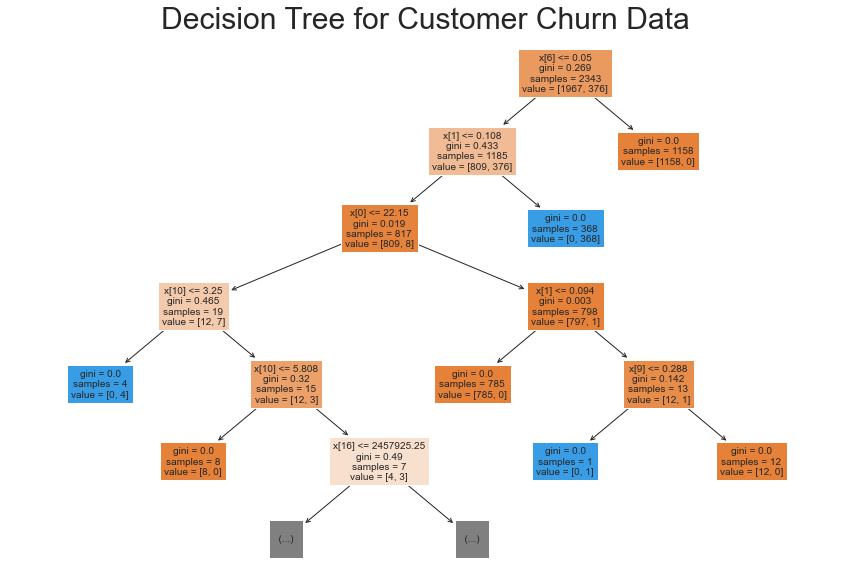

In [ ]:
from sklearn import tree
s = plt.figure(figsize=(15,10))
tree.plot_tree(clf, max_depth=5, filled=True, fontsize=10)
plt.title("Decision Tree for Customer Churn Data", fontsize=30)
plt.show() 

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

predictions = clf.predict(X_test)
acc = accuracy_score(y_test, predictions)
print(str(np.round(acc*100, 2))+'%')

99.45%


In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1965
           1       0.98      0.99      0.98       379

    accuracy                           0.99      2344
   macro avg       0.99      0.99      0.99      2344
weighted avg       0.99      0.99      0.99      2344



In [ ]:
print(confusion_matrix(y_test,predictions))

[[1957    8]
 [   5  374]]
